In [13]:
# Load relevant packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as sm
import warnings
from sklearn.cluster import KMeans 

In [14]:
## load data set
carmax_df = pd.read_csv('CaseDataRemodeled.csv')
top10_df = pd.read_csv('Top10ByIncome.csv')

## Time to Cluster - Gonna use k-means initially 




In general, we can cluster observations on the basis of the features in order to identify subgroups among the observations, or we can cluster fea- tures on the basis of the observations in order to discover subgroups among the features. In what follows, for simplicity we will discuss clustering obser- vations on the basis of the features, though the converse can be performed by simply transposing the data matrix.

In [15]:
top10_df.columns
top10_df = top10_df.drop('Unnamed: 0', axis=1)

In [16]:
top10_df['purchase_model']

0               CAMRY
1              ALTIMA
2             COROLLA
3              MALIBU
4              ACCORD
5               CIVIC
6               VERSA
7               FOCUS
8              IMPALA
9              ESCAPE
10               F150
11              CAMRY
12             ALTIMA
13             ACCORD
14               C300
15                G37
16                328
17               EDGE
18           RAM 1500
19            MUSTANG
20               F150
21              CAMRY
22                328
23               C300
24             ACCORD
25             ALTIMA
26                G37
27           RAM 1500
28               E350
29              PRIUS
            ...      
90             ALTIMA
91              CAMRY
92             ACCORD
93               F150
94           RAM 1500
95             MALIBU
96             SONATA
97            MUSTANG
98               C300
99     SILVERADO 1500
100            ALTIMA
101              F150
102             CAMRY
103            ACCORD
104       

In [17]:
cluster_df = carmax_df[carmax_df['purchase_model'].isin(list(set(top10_df['purchase_model'])))]
cluster_df = cluster_df.drop('insert_num', axis=1)

In [18]:
cluster_df

purchase_make  purchase_model  purchase_vehicle_year  \
1                FORD            F150                   2007   
2                 BMW             328                   2010   
5              NISSAN          ALTIMA                   2009   
8                FORD          ESCAPE                   2010   
10             NISSAN          SENTRA                   2009   
11             NISSAN           VERSA                   2011   
17               FORD            F150                   2006   
18             TOYOTA         COROLLA                   2009   
19               FORD           FOCUS                   2012   
24             TOYOTA          TUNDRA                   2009   
25             NISSAN           VERSA                   2009   
26          CHEVROLET          IMPALA                   2009   
30             NISSAN          ALTIMA                   2012   
32              HONDA          ACCORD                   2007   
35             NISSAN           VERSA                   2007   
42            HYUNDAI          SONATA                   2011   
43               FORD          ESCAPE                   2011   
45          CHEVROLET          MALIBU                   2012   
46             TOYOTA         COROLLA                   2003   
52              DODGE         AVENGER                   2012   
54              HONDA           CIVIC                   2010   
55              HONDA          ACCORD                   2010   
58            HYUNDAI          SONATA                   2013   
59               FORD         MUSTANG                   2011   
60             TOYOTA            RAV4                   2007   
61              HONDA          ACCORD                   2004   
62              HONDA           CIVIC                   2012   
63             TOYOTA         COROLLA                   2012   
64          CHEVROLET          IMPALA                   2011   
66              DODGE        RAM 1500                   2007   
...               ...             ...                    ...   
355786           FORD          ESCAPE                   2011   
355787          HONDA          ACCORD                   2009   
355791         NISSAN          SENTRA                   2007   
355792         TOYOTA           CAMRY                   2011   
355793      CHEVROLET          IMPALA                   2007   
355798        HYUNDAI          SONATA                   2011   
355802          HONDA          ACCORD                   2010   
355807         TOYOTA           CAMRY                   2013   
355808          DODGE         AVENGER                   2012   
355810         TOYOTA          TUNDRA                   2004   
355811  MERCEDES-BENZ            C300                   2010   
355812      CHEVROLET          IMPALA                   2012   
355815         NISSAN           VERSA                   2012   
355820          DODGE         AVENGER                   2012   
355822          HONDA          ACCORD                   2012   
355827            BMW             328                   2011   
355828      CHEVROLET  SILVERADO 1500                   2011   
355832         TOYOTA         COROLLA                   2012   
355833         TOYOTA           PRIUS                   2010   
355838          HONDA            CR-V                   2010   
355839          HONDA          ACCORD                   2006   
355841           FORD            F150                   2009   
355843         TOYOTA           CAMRY                   2010   
355846           FORD           FOCUS                   2010   
355849           JEEP  GRAND CHEROKEE                   2011   
355854           FORD           FOCUS                   2013   
355860        HYUNDAI          SONATA                   2011   
355864          HONDA          ACCORD                   2007   
355866         TOYOTA            RAV4                   2011   
355873      CHEVROLET          MALIBU                   2012   

        purchase_price_LB  purchase_pri

In [19]:
len(list(set(top10_df['purchase_model'])))

30

In [20]:
cluster_df.dtypes

purchase_make                   object
purchase_model                  object
purchase_vehicle_year            int64
purchase_price_LB              float64
purchase_price_UB              float64
trade_in                         int64
vehicle_financing                int64
customer_age                    object
customer_income                 object
customer_gender                 object
customer_previous_purchase       int64
customer_distance_to_dealer    float64
post_purchase_satisfaction      object
vehicle_warranty_used            int64
subsequent_purchases             int64
AgeBin                          object
purchase_class                  object
dtype: object

In [21]:
cluster_df = cluster_df.drop('customer_age', axis=1)
cluster_df = cluster_df.drop('post_purchase_satisfaction', axis=1)
cluster_df = cluster_df.drop('purchase_make', axis=1)

In [22]:
# function to transform into numerical bins by normal/gaussian distribution
def categorical_transform(col):
    classnames, factorval, rank = np.unique(col, return_inverse = True,return_counts = True)
    
    temp = np.array(rank)
    temp.sort()
    temp = np.concatenate((temp[::2], temp[~np.isin(temp,temp[::2])][::-1]))

    category_count = {}
    for i in range(len(classnames)):
        category_count[classnames[i]] = rank[i]
    
    vals = [i * 5 for i in range(len(temp))]
    
    for i in range(len(temp)):
        for key, value in category_count.items():
            if value == temp[i]:
                category_count[key] = vals[i]
            
    check_list = list(col)
    for i in range(len(check_list)):
        for key, value in category_count.items():
            if check_list[i] == key:
                factorval[i] = value 
                break
    
    return category_count, factorval

In [23]:
## references of transformation for later 
references = {}

for i in cluster_df.columns:
    if cluster_df[i].dtype == 'object':
        classes = cluster_df[i]
        references[i], cluster_df[i] = categorical_transform(classes)

In [24]:
cluster_df.dtypes

purchase_model                   int64
purchase_vehicle_year            int64
purchase_price_LB              float64
purchase_price_UB              float64
trade_in                         int64
vehicle_financing                int64
customer_income                  int64
customer_gender                  int64
customer_previous_purchase       int64
customer_distance_to_dealer    float64
vehicle_warranty_used            int64
subsequent_purchases             int64
AgeBin                           int64
purchase_class                   int64
dtype: object

In [14]:
cluster_df

purchase_model  purchase_vehicle_year  purchase_price_LB  \
1                   90                   2007            15001.0   
2                   25                   2010            25001.0   
5                   75                   2009            15001.0   
8                   50                   2010            15001.0   
10                  45                   2009            10001.0   
...                ...                    ...                ...   
355854             100                   2013            20001.0   
355860              95                   2011            20001.0   
355864              80                   2007            15001.0   
355866              35                   2011            20001.0   
355873              65                   2012            15001.0   

        purchase_price_UB  trade_in  vehicle_financing  customer_income  \
1                 20000.0         0                  0               40   
2                 30000.0         1                  1               20   
5                 20000.0         1                  1               20   
8                 20000.0         1                  1               25   
10                15000.0         0                  1               30   
...                   ...       ...                ...              ...   
355854            25000.0         1                  1               45   
355860            25000.0         1                  0               35   
355864            20000.0         0                  1               30   
355866            25000.0         1                  1               25   
355873            20000.0         1                  1               35   

        customer_gender  customer_previous_purchase  \
1                    10                           1   
2                    10                           1   
5                     0                           0   
8                     0                           1   
10                    0                           0   
...                 ...                         ...   
355854                5                           1   
355860                5                           0   
355864               10                           0   
355866               10                           1   
355873                5                           0   

        customer_distance_to_dealer  vehicle_warranty_used  \
1                              19.0                      0   
2                              21.0                      0   
5                               2.0                      1   
8                              14.0                      1   
10                              NaN                      0   
...                             ...                    ...   
355854                          4.0                      0   
355860                          7.0                      0   
355864                         12.0                      0   
355866                          3.0                      0   
355873                          9.0                      0   

        subsequent_purchases  AgeBin  purchase_class  
1                          0      35               5  
2                          0      20              15  
5                          1      25              15  
8                          0      20              10  
10                         1      15              15  
...                      ...     ...             ...  
355854                     2      30              15  
355860                     1      20              15  
355864                     0      25              20  
355866                     0      35              10  
355873                     0      30              15  

[137788 rows x 14 columns]

In [15]:
from sklearn.preprocessing import StandardScaler

X = cluster_df.values[:,:]
X = np.nan_to_num(X)
cluster_dataset = StandardScaler().fit_transform(X)
cluster_dataset

array([[ 0.46550396, -1.30434939, -0.09561966, ..., -0.44335392,
         1.27463107, -1.64014046],
       [-1.39124196,  0.0304836 ,  1.60397292, ..., -0.44335392,
        -0.86425427,  0.19713047],
       [ 0.03702413, -0.41446073, -0.09561966, ...,  0.39398434,
        -0.15129249,  0.19713047],
       ...,
       [ 0.17985074, -1.30434939, -0.09561966, ..., -0.44335392,
        -0.15129249,  1.11576594],
       [-1.10558875,  0.47542793,  0.75417663, ..., -0.44335392,
         1.27463107, -0.721505  ],
       [-0.24862909,  0.92037227, -0.09561966, ..., -0.44335392,
         0.56166929,  0.19713047]])

Lets run model cluster

In [16]:
num_clusters = 4

k_means = KMeans(init="k-means++", n_clusters=num_clusters, n_init=50,algorithm = "elkan")
k_means.fit(cluster_dataset)
labels = k_means.labels_

print(labels)

[0 1 3 ... 0 1 0]


In [17]:
cluster_df["Labels"] = labels
cluster_df.head(5)

purchase_model  purchase_vehicle_year  purchase_price_LB  \
1               90                   2007            15001.0   
2               25                   2010            25001.0   
5               75                   2009            15001.0   
8               50                   2010            15001.0   
10              45                   2009            10001.0   

    purchase_price_UB  trade_in  vehicle_financing  customer_income  \
1             20000.0         0                  0               40   
2             30000.0         1                  1               20   
5             20000.0         1                  1               20   
8             20000.0         1                  1               25   
10            15000.0         0                  1               30   

    customer_gender  customer_previous_purchase  customer_distance_to_dealer  \
1                10                           1                         19.0   
2                10                           1                         21.0   
5                 0                           0                          2.0   
8                 0                           1                         14.0   
10                0                           0                          NaN   

    vehicle_warranty_used  subsequent_purchases  AgeBin  purchase_class  \
1                       0                     0      35               5   
2                       0                     0      20              15   
5                       1                     1      25              15   
8                       1                     0      20              10   
10                      0                     1      15              15   

    Labels  
1        0  
2        1  
5        3  
8        3  
10       0

In [18]:
# can easily change agg argument ---- is mode best?
#cluster_df.groupby('Labels').agg(lambda x: pd.Series.mode(x)[0])
cluster_df.groupby('Labels').mean()

purchase_model  purchase_vehicle_year  purchase_price_LB  \
Labels                                                             
0            73.015390            2009.792631       12880.821201   
1            76.103150            2010.961669       23870.133858   
2            67.216495            2010.103093       16289.659794   
3            72.921023            2009.140914       13619.356789   

        purchase_price_UB  trade_in  vehicle_financing  customer_income  \
Labels                                                                    
0            17879.821201  0.385811           0.802810        28.764496   
1            28869.133858  0.595276           0.731055        27.085669   
2            21288.659794  0.546392           0.804124        27.164948   
3            18618.356789  0.445679           0.824355        28.359864   

        customer_gender  customer_previous_purchase  \
Labels                                                
0              6.548914                    0.164598   
1              6.198268                    0.286236   
2              6.443299                    0.164948   
3              6.513151                    0.179371   

        customer_distance_to_dealer  vehicle_warranty_used  \
Labels                                                       
0                         13.659581               0.000000   
1                         14.200384               0.094992   
2                       2103.257732               0.216495   
3                         12.145856               0.999964   

        subsequent_purchases     AgeBin  purchase_class  
Labels                                                   
0                   0.517612  26.009962       14.551341  
1                   0.541921  26.192283       12.182677  
2                   0.556701  26.546392       13.711340  
3                   0.548714  26.053146       14.163019

#### Questions To Ask:
    How many clusters do we actually want?
    
    Are certain columns influencing negatively or contradicting? 
        e.g. cluster one average make is a Ford with Nissan Altima average model
    

### HCluster

In [19]:
#from sklearn.cluster import FeatureAgglomeration 
#import time as time
#hcluster = FeatureAgglomeration(n_clusters= None, linkage ='ward',distance_threshold = 0).fit(data_scaled)

https://towardsdatascience.com/scale-standardize-or-normalize-with-scikit-learn-6ccc7d176a02


https://gist.github.com/PulkitS01/8ac9bf3b54eb59b4e1d4eaa21d3d774e#file-scaling_data-py

In [20]:
from sklearn.preprocessing import normalize
#Normalizer().fit_transform(X))

try:
    hcluster_df = cluster_df.copy().drop('Labels', axis=1).sample(frac = 0.3, random_state = 1)
    X = hcluster_df.values[:,:]
except:
    hcluster_df = cluster_df.copy().sample(frac = 0.3, random_state = 1)
    X = hcluster_df.values[:,:]


X = np.nan_to_num(X)

data_scaled = normalize(X)
data_scaled = pd.DataFrame(data_scaled,columns = hcluster_df.columns)


#cluster_dataset = StandardScaler().fit_transform(X)
#cluster_dataset


In [21]:
from scipy.cluster.hierarchy import dendrogram

def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_,
                                      counts]).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

In [22]:
from sklearn.cluster import AgglomerativeClustering
hclustering = AgglomerativeClustering(distance_threshold=None, n_clusters=4, linkage='ward').fit_predict(data_scaled)

In [23]:
# import scipy.cluster.hierarchy as shc

# plt.figure(figsize=(10, 7))
# plt.title("Customer Dendograms")
# dend = shc.dendrogram(shc.linkage(data_frac, method='ward'))

# from scipy.cluster.hierarchy import dendrogram

# plt.title('Hierarchical Clustering Dendrogram')
# # plot the top three levels of the dendrogram
# plot_dendrogram(hclustering, truncate_mode='level', p=3)
# plt.xlabel("Number of points in node (or index of point if no parenthesis).")
# plt.show()

In [24]:
hcluster_df["Labels"] = hclustering
hcluster_df.head(5)

purchase_model  purchase_vehicle_year  purchase_price_LB  \
229617              30                   2006            15001.0   
318093              30                   2008            15001.0   
202919             125                   2008            10001.0   
295381              40                   2008            10001.0   
324517              75                   2012            20001.0   

        purchase_price_UB  trade_in  vehicle_financing  customer_income  \
229617            20000.0         1                  1               30   
318093            20000.0         0                  1               25   
202919            15000.0         1                  1               20   
295381            15000.0         0                  0               35   
324517            25000.0         0                  1               25   

        customer_gender  customer_previous_purchase  \
229617                5                           0   
318093                5                           0   
202919                5                           0   
295381                0                           0   
324517                0                           0   

        customer_distance_to_dealer  vehicle_warranty_used  \
229617                         12.0                      0   
318093                          3.0                      0   
202919                          9.0                      0   
295381                          6.0                      1   
324517                          1.0                      0   

        subsequent_purchases  AgeBin  purchase_class  Labels  
229617                     1      20               5       2  
318093                     1      35               5       2  
202919                     0      35              15       1  
295381                     1      30              15       1  
324517                     0      30              15       0

### Gaussian Mixture 
https://github.com/ocontreras309/ML_Notebooks/blob/master/GMM_Implementation.ipynb

In [25]:
from sklearn import mixture
import itertools
import matplotlib as mpl
from scipy import linalg

In [26]:
lowest_bic = np.infty
bic = []
n_components_range = range(1, 7)
cv_types = ['spherical', 'tied', 'diag', 'full']
for cv_type in cv_types:
    for n_components in n_components_range:
        # Fit a Gaussian mixture with EM
        gmm = mixture.GaussianMixture(n_components=n_components,
                                      covariance_type=cv_type)
        gmm.fit(cluster_dataset)
        bic.append(gmm.bic(cluster_dataset))
        if bic[-1] < lowest_bic:
            lowest_bic = bic[-1]
            best_gmm = gmm

bic = np.array(bic)
color_iter = itertools.cycle(['navy', 'turquoise', 'cornflowerblue',
                              'darkorange'])
clf = best_gmm
bars = []

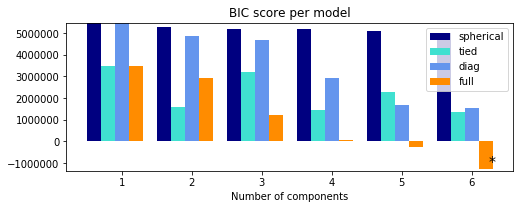

In [27]:
# Plot the BIC scores
plt.figure(figsize=(8, 6))
spl = plt.subplot(2, 1, 1)
for i, (cv_type, color) in enumerate(zip(cv_types, color_iter)):
    xpos = np.array(n_components_range) + .2 * (i - 2)
    bars.append(plt.bar(xpos, bic[i * len(n_components_range):
                                  (i + 1) * len(n_components_range)],
                        width=.2, color=color))
plt.xticks(n_components_range)
plt.ylim([bic.min() * 1.01 - .01 * bic.max(), bic.max()])
plt.title('BIC score per model')
xpos = np.mod(bic.argmin(), len(n_components_range)) + .65 +\
    .2 * np.floor(bic.argmin() / len(n_components_range))
plt.text(xpos, bic.min() * 0.97 + .03 * bic.max(), '*', fontsize=14)
spl.set_xlabel('Number of components')
spl.legend([b[0] for b in bars], cv_types)

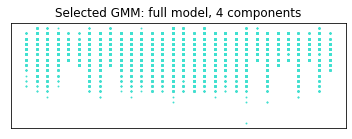

In [28]:
# Plot the winner
splot = plt.subplot(2, 1, 2)
Y_ = clf.predict(X)
for i, (mean, cov, color) in enumerate(zip(clf.means_, clf.covariances_,
                                           color_iter)):
    v, w = linalg.eigh(cov)
    if not np.any(Y_ == i):
        continue
    plt.scatter(X[Y_ == i, 0], X[Y_ == i, 1], .8, color=color)

    # Plot an ellipse to show the Gaussian component
    angle = np.arctan2(w[0][1], w[0][0])
    angle = 180. * angle / np.pi  # convert to degrees
    v = 2. * np.sqrt(2.) * np.sqrt(v)
    ell = mpl.patches.Ellipse(mean, v[0], v[1], 180. + angle, color=color)
    ell.set_clip_box(splot.bbox)
    ell.set_alpha(.5)
    splot.add_artist(ell)

plt.xticks(())
plt.yticks(())
plt.title('Selected GMM: full model, 4 components')
plt.subplots_adjust(hspace=.35, bottom=.02)
plt.show()

In [29]:
gmm = mixture.GaussianMixture(n_components= 4,
                                      covariance_type= 'full',max_iter=500,n_init=50)
gmmlabels = gmm.fit_predict(cluster_dataset)

In [30]:
gmcluster_df = cluster_df.copy().drop('Labels', axis=1)
gmcluster_df["Labels"] = gmmlabels

In [31]:
cluster_df.groupby('Labels').agg(lambda x: pd.Series.mode(x)[0])
#cluster_df.groupby('Labels').mean()

purchase_model  purchase_vehicle_year  purchase_price_LB  \
Labels                                                             
0                   75                   2010            15001.0   
1                   90                   2011            20001.0   
2                   55                   2012            15001.0   
3                   75                   2010            15001.0   

        purchase_price_UB  trade_in  vehicle_financing  customer_income  \
Labels                                                                    
0                 20000.0         0                  1               30   
1                 25000.0         1                  1               25   
2                 20000.0         1                  1               25   
3                 20000.0         0                  1               30   

        customer_gender  customer_previous_purchase  \
Labels                                                
0                     5                           0   
1                     5                           0   
2                     5                           0   
3                     5                           0   

        customer_distance_to_dealer  vehicle_warranty_used  \
Labels                                                       
0                               5.0                      0   
1                               5.0                      0   
2                            2392.0                      0   
3                               6.0                      1   

        subsequent_purchases  AgeBin  purchase_class  
Labels                                                
0                          0      25              15  
1                          0      20               5  
2                          0      25              15  
3                          0      25              15

In [32]:
hcluster_df.groupby('Labels').agg(lambda x: pd.Series.mode(x)[0])
#hcluster_df.groupby('Labels').mean()

purchase_model  purchase_vehicle_year  purchase_price_LB  \
Labels                                                             
0                   90                   2011            20001.0   
1                   85                   2010            10001.0   
2                   75                   2010            15001.0   
3                  100                   2005             5001.0   

        purchase_price_UB  trade_in  vehicle_financing  customer_income  \
Labels                                                                    
0                 25000.0         1                  1               25   
1                 15000.0         0                  1               30   
2                 20000.0         0                  1               25   
3                 10000.0         0                  1               30   

        customer_gender  customer_previous_purchase  \
Labels                                                
0                     5                           0   
1                     5                           0   
2                     5                           0   
3                     5                           0   

        customer_distance_to_dealer  vehicle_warranty_used  \
Labels                                                       
0                               5.0                      0   
1                               6.0                      0   
2                               6.0                      0   
3                               3.0                      0   

        subsequent_purchases  AgeBin  purchase_class  
Labels                                                
0                          0      20               5  
1                          0      25              15  
2                          0      25              15  
3                          0      25              15

In [33]:
gmcluster_df.groupby('Labels').agg(lambda x: pd.Series.mode(x)[0])

purchase_model  purchase_vehicle_year  purchase_price_LB  \
Labels                                                             
0                   75                   2010            15001.0   
1                   75                   2010            15001.0   
2                   90                   2012            15001.0   
3                   75                   2010            15001.0   

        purchase_price_UB  trade_in  vehicle_financing  customer_income  \
Labels                                                                    
0                 20000.0         0                  0               35   
1                 20000.0         0                  1               30   
2                 20000.0         0                  1               25   
3                 20000.0         1                  1               30   

        customer_gender  customer_previous_purchase  \
Labels                                                
0                     5                           0   
1                     5                           0   
2                     5                           0   
3                     5                           1   

        customer_distance_to_dealer  vehicle_warranty_used  \
Labels                                                       
0                               5.0                      0   
1                               5.0                      0   
2                              80.0                      0   
3                               6.0                      1   

        subsequent_purchases  AgeBin  purchase_class  
Labels                                                
0                          0      20              15  
1                          0      25              15  
2                          0      25              15  
3                          0      20              15

In [43]:
references

{'purchase_model': {'328': 25,
  'ACCORD': 80,
  'ALTIMA': 75,
  'AVENGER': 125,
  'C300': 20,
  'CAMRY': 70,
  'CIVIC': 60,
  'COROLLA': 85,
  'CR-V': 130,
  'E350': 145,
  'EDGE': 120,
  'ESCAPE': 50,
  'F150': 90,
  'FOCUS': 100,
  'G37': 135,
  'GRAND CHEROKEE': 5,
  'IMPALA': 55,
  'MALIBU': 65,
  'MUSTANG': 105,
  'PRIUS': 15,
  'RAM 1500': 30,
  'RAV4': 35,
  'ROGUE': 110,
  'SENTRA': 45,
  'SILVERADO 1500': 115,
  'SONATA': 95,
  'TUNDRA': 140,
  'VERSA': 40,
  'WRANGLER': 10,
  'X5': 0},
 'customer_income': {'0 - 20000': 40,
  '100001 - 120000': 45,
  '120001 - 140000': 50,
  '140001 - 160000': 5,
  '160001 - 180000': 55,
  '180001 - 200000': 0,
  '200001+': 10,
  '20001 - 40000': 30,
  '40001 - 60000': 25,
  '60001 - 80000': 20,
  '80001 - 100000': 15,
  '?': 35},
 'customer_gender': {'F': 10, 'M': 5, 'U': 0},
 'AgeBin': {'Eighties': 45,
  'Fifties': 35,
  'Forties': 20,
  'HundredPlus': 5,
  'Nineties': 0,
  'Seventies': 40,
  'Sixties': 15,
  'Thirties': 30,
  'Twenties': 2

In [35]:
def cat_to_names(df,references):
    temp_df = df.copy()
    for key in references.keys():
        vals = references[key]
        for label_key in vals.keys():
            temp_df[key] = temp_df[key].replace(vals[label_key],label_key)
    return temp_df
    

## Focusing your marketing message: In parallel with improvements to the product, conducting a customer segmentation project can help you develop more focused marketing messages that are customized to each of your best segments, resulting in higher quality inbound interest in your product.

### Let's see what avenues of Customer Segmentation we can Identify

So from above it seems that the way we will do our segmentation is based on 
- Purchase Class
- Purchase Income
- Customer Income
- Customer Gender
- Age

### Clusters by Gender and Puchase Model

In [57]:
cluster_with_names = cat_to_names(cluster_df,references)
cluster_with_names.groupby('Labels').agg(lambda x: pd.Series.mode(x)[0])

purchase_model  purchase_vehicle_year  purchase_price_LB  \
Labels                                                            
0              ALTIMA                   2010            15001.0   
1                F150                   2011            20001.0   
2                F150                   2012            15001.0   
3              ALTIMA                   2010            15001.0   

        purchase_price_UB  trade_in  vehicle_financing customer_income  \
Labels                                                                   
0                 20000.0         0                  1   20001 - 40000   
1                 25000.0         1                  1   40001 - 60000   
2                 20000.0         1                  1   40001 - 60000   
3                 20000.0         0                  1   20001 - 40000   

       customer_gender  customer_previous_purchase  \
Labels                                               
0                    M                           0   
1                    M                           0   
2                    M                           0   
3                    M                           0   

        customer_distance_to_dealer  vehicle_warranty_used  \
Labels                                                       
0                               5.0                      0   
1                               5.0                      0   
2                            2392.0                      0   
3                               6.0                      1   

        subsequent_purchases    AgeBin purchase_class  
Labels                                                 
0                          0  Twenties          sedan  
1                          0   Forties          truck  
2                          0  Twenties          sedan  
3                          0  Twenties          sedan

In [55]:
cluster_with_names = cat_to_names(cluster_df,references)
counts_of_puchase_models = cluster_with_names.groupby(['Labels','customer_gender','purchase_model']).count().reset_index()
cluster1 = counts_of_puchase_models[counts_of_puchase_models.Labels==3]
cluster1[cluster1.customer_gender=='F'].sort_values(by='purchase_vehicle_year',ascending=False).head(10)

Labels customer_gender purchase_model  purchase_vehicle_year  \
229       3               F         ALTIMA                   1320   
232       3               F          CAMRY                    921   
228       3               F         ACCORD                    827   
244       3               F         MALIBU                    744   
234       3               F        COROLLA                    584   
252       3               F         SONATA                    566   
250       3               F         SENTRA                    557   
233       3               F          CIVIC                    510   
238       3               F         ESCAPE                    468   
254       3               F          VERSA                    457   

     purchase_price_LB  purchase_price_UB  trade_in  vehicle_financing  \
229               1320               1320      1320               1320   
232                921                921       921                921   
228                827                827       827                827   
244                744                744       744                744   
234                584                584       584                584   
252                566                566       566                566   
250                557                557       557                557   
233                510                510       510                510   
238                468                468       468                468   
254                457                457       457                457   

     customer_income  customer_previous_purchase  customer_distance_to_dealer  \
229             1320                        1320                         1302   
232              921                         921                          908   
228              827                         827                          822   
244              744                         744                          736   
234              584                         584                          574   
252              566                         566                          563   
250              557                         557                          555   
233              510                         510                          505   
238              468                         468                          460   
254              457                         457                          447   

     vehicle_warranty_used  subsequent_purchases  AgeBin  purchase_class  
229                   1320                  1320    1320            1320  
232                    921                   921     921             921  
228                    827                   827     827             827  
244                    744                   744     744             744  
234                    584                   584     584             584  
252                    566                   566     566             566  
250                    557                   557     557             557  
233                    510                   510     510             510  
238                    468                   468     468             468  
254                    457                   457     457             457

#### Let's Filter out to only keep top 10

In [51]:
cluster_with_names = cat_to_names(cluster_df,references)
counts_of_puchase_models = cluster_with_names.groupby(['Labels','customer_gender','purchase_model']).count().reset_index().rename(columns={"purchase_vehicle_year":"count"})

top10_dfs = []
for i in counts_of_puchase_models['Labels'].unique():
    temp_df=counts_of_puchase_models[counts_of_puchase_models.Labels==i]
    for j in counts_of_puchase_models['customer_gender'].unique():
        temp_df2=temp_df[temp_df.customer_gender==j].sort_values(by='count',ascending=False).head(10)
        top10_dfs.append( temp_df2)
top10_dfs = pd.concat(top10_dfs)
top10_dfs[['Labels','customer_gender','purchase_model','count']]

Labels customer_gender purchase_model  count
2         0               F         ALTIMA   3532
5         0               F          CAMRY   2812
7         0               F        COROLLA   2391
17        0               F         MALIBU   2201
1         0               F         ACCORD   2163
..      ...             ...            ...    ...
303       3               U         IMPALA    169
294       3               U        COROLLA    145
310       3               U         SENTRA    139
293       3               U          CIVIC    132
287       3               U            328    116

[118 rows x 4 columns]

In [38]:
print("Simplified from",cluster_with_names.shape[0],"rows to ",top10_dfs.shape[0],"rows.")

Simplified from 137788 rows to  120 rows.


### Let's Just Look at the top within this segmentation

In [52]:
cluster_with_names = cat_to_names(cluster_df,references)
counts_of_puchase_models = cluster_with_names.groupby(['Labels','customer_gender','purchase_model']).count().reset_index().rename(columns={"purchase_vehicle_year":"count"})

top10_dfs = []
for i in counts_of_puchase_models['Labels'].unique():
    temp_df=counts_of_puchase_models[counts_of_puchase_models.Labels==i]
    for j in counts_of_puchase_models['customer_gender'].unique():
        temp_df2=temp_df[temp_df.customer_gender==j].sort_values(by='count',ascending=False).head(1)
        top10_dfs.append( temp_df2)
top10_dfs = pd.concat(top10_dfs)[['Labels','customer_gender','purchase_model','count']]
top10_dfs

Labels customer_gender purchase_model  count
2         0               F         ALTIMA   3532
32        0               M         ALTIMA   3158
62        0               U         ALTIMA   1076
100       1               F           EDGE    996
131       1               M           F150   2855
152       1               U           C300    288
191       2               F         MALIBU      3
218       2               M       WRANGLER      6
219       2               U          CIVIC      2
229       3               F         ALTIMA   1320
259       3               M         ALTIMA   1008
289       3               U         ALTIMA    430

In [40]:
counts_of_income_models = cluster_with_names.groupby(['Labels','customer_income','purchase_model']).count().reset_index().rename(columns={"purchase_vehicle_year":"count"})
top10_dfs = []
for i in counts_of_income_models['Labels'].unique():
    temp_df=counts_of_income_models[counts_of_income_models.Labels==i]
    for j in counts_of_income_models['customer_income'].unique():
        temp_df2=temp_df[temp_df.customer_income==j].sort_values(by='count',ascending=False).head(1)
        top10_dfs.append( temp_df2)
top10_dfs = pd.concat(top10_dfs)[['Labels','customer_income','purchase_model','count']]
top10_dfs

Labels  customer_income purchase_model  count
5          0        0 - 20000          CAMRY    213
42         0  100001 - 120000           F150     39
72         0  120001 - 140000           F150     22
102        0  140001 - 160000           F150     27
120        0  160001 - 180000            328     10
159        0  180001 - 200000           F150      9
185        0          200001+           F150     34
205        0    20001 - 40000         ALTIMA    310
235        0    40001 - 60000         ALTIMA    239
265        0    60001 - 80000         ALTIMA    104
305        0   80001 - 100000           F150     70
328        0                ?          CAMRY   1119
358        1        0 - 20000          CAMRY    477
395        1  100001 - 120000           F150    188
418        1  120001 - 140000          CAMRY     82
443        1  140001 - 160000            328     73
485        1  160001 - 180000           F150     34
507        1  180001 - 200000           C300     16
545        1          200001+           F150    117
565        1    20001 - 40000         ALTIMA   2262
595        1    40001 - 60000         ALTIMA   1858
625        1    60001 - 80000         ALTIMA    687
655        1   80001 - 100000         ALTIMA    355
690        1                ?        COROLLA     76
725        2        0 - 20000           F150     15
754        2  100001 - 120000           F150      8
775        2  120001 - 140000           F150      4
784        2  140001 - 160000            328      5
814        2  160001 - 180000         TUNDRA      2
816        2  180001 - 200000            328      2
842        2          200001+       WRANGLER      6
861        2    20001 - 40000         MALIBU     28
885        2    40001 - 60000           F150     22
914        2    60001 - 80000           F150     18
941        2   80001 - 100000           F150     19
971        2                ?           F150     31
994        3        0 - 20000          CAMRY    239
1031       3  100001 - 120000           F150    146
1061       3  120001 - 140000           F150     70
1091       3  140001 - 160000           F150     90
1121       3  160001 - 180000           F150     51
1151       3  180001 - 200000           F150     29
1181       3          200001+           F150    119
1201       3    20001 - 40000         ALTIMA   1178
1231       3    40001 - 60000         ALTIMA   1024
1261       3    60001 - 80000         ALTIMA    490
1291       3   80001 - 100000         ALTIMA    273
1320       3                ?         ACCORD     25